# Problem 2

### (a) Check CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [4]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

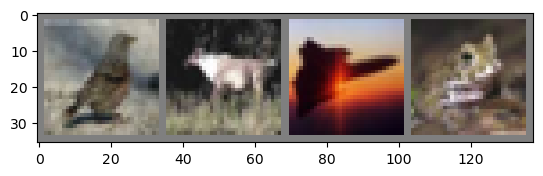

bird  deer  plane frog 


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

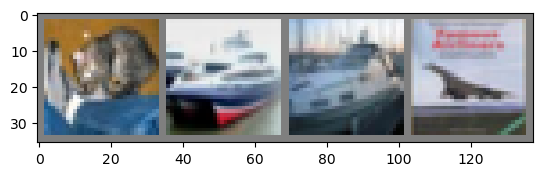

cat   ship  ship  plane


In [6]:
# get some random training images
dataiter = iter(testloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [7]:
images, labels = next(dataiter)
images.shape # 4 is batch size

torch.Size([4, 3, 32, 32])

### (b) Train 1 hidden layer ReLU

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, k=128):
        super(Net, self).__init__()
        self.k = k
        self.fc1 = nn.Linear(3 * 32 * 32, self.k, bias=False)
        self.fc2 = nn.Linear(self.k, 10, bias=False)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32) # [batchsize, 3072]
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return x

model = Net(k=128)

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# train the model
num_epochs = 20
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

# Loop through the number of epochs
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    test_loss = 0.0
    test_acc = 0.0

    # set model to train mode
    model.train()
    # iterate over the training data
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        
        #compute the loss
        one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=10)
        loss = criterion(outputs, one_hot_labels.float())
        loss.backward()
        optimizer.step()
        # increment the running loss and accuracy
        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()

    # calculate the average training loss and accuracy
    train_loss /= len(trainloader)
    train_loss_history.append(train_loss)
    train_acc /= len(trainloader.dataset)
    train_acc_history.append(train_acc)

    # set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)

            #compute the loss
            one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=10)
            loss = criterion(outputs, one_hot_labels.float())

            test_loss += loss.item()
            test_acc += (outputs.argmax(1) == labels).sum().item()

    # calculate the average validation loss and accuracy
    test_loss /= len(testloader)
    test_loss_history.append(test_loss)
    test_acc /= len(testloader.dataset)
    test_acc_history.append(test_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {test_loss:.4f}, val acc: {test_acc:.4f}')

Epoch 1/20, train loss: 0.0944, train acc: 0.3199, val loss: 0.0879, val acc: 0.3390
Epoch 2/20, train loss: 0.0952, train acc: 0.3307, val loss: 0.1536, val acc: 0.2732
Epoch 3/20, train loss: 0.0942, train acc: 0.3431, val loss: 0.0938, val acc: 0.3313
Epoch 4/20, train loss: 0.0941, train acc: 0.3450, val loss: 0.0846, val acc: 0.3601
Epoch 5/20, train loss: 0.0935, train acc: 0.3508, val loss: 0.0916, val acc: 0.3296
Epoch 6/20, train loss: 0.0951, train acc: 0.3520, val loss: 0.0854, val acc: 0.3571
Epoch 7/20, train loss: 0.0928, train acc: 0.3552, val loss: 0.0904, val acc: 0.3580
Epoch 8/20, train loss: 0.0945, train acc: 0.3527, val loss: 0.0873, val acc: 0.3521
Epoch 9/20, train loss: 0.0949, train acc: 0.3622, val loss: 0.0998, val acc: 0.3059
Epoch 10/20, train loss: 0.0947, train acc: 0.3583, val loss: 0.1001, val acc: 0.3121
Epoch 11/20, train loss: 0.0986, train acc: 0.3668, val loss: 0.0846, val acc: 0.3774
Epoch 12/20, train loss: 0.0927, train acc: 0.3628, val loss: 0

After $20$ epochs of training, it achieves $32\%$ of accuracy on test set.